# Rent Prediction

In [194]:
import pandas as pd

In [195]:
df=pd.read_excel('House_Rent_Train.xlsx')

In [196]:
df

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,2017-09-10 12:48:00,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,2018-12-06 22:02:00,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20550,19,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20551,20,BHK2,NaN,NaN,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20552,21,BHK2,NaN,NaN,NaN,NaN,NaN,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20553,22,BHK2,NaN,NaN,NaN,NaN,NaN,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20555 entries, 0 to 20554
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20555 non-null  object 
 1   type             20528 non-null  object 
 2   locality         20395 non-null  object 
 3   activation_date  20532 non-null  object 
 4   latitude         20532 non-null  float64
 5   longitude        20532 non-null  float64
 6   lease_type       20532 non-null  object 
 7   gym              20555 non-null  int64  
 8   lift             20555 non-null  int64  
 9   swimming_pool    20555 non-null  int64  
 10  negotiable       20555 non-null  int64  
 11  furnishing       20555 non-null  object 
 12  parking          20555 non-null  object 
 13  property_size    20555 non-null  int64  
 14  property_age     20532 non-null  float64
 15  bathroom         20532 non-null  float64
 16  facing           20532 non-null  object 
 17  cup_board   

In [198]:
#dropping duplicates and null values 
df=df.drop_duplicates()
df=df.dropna()

In [199]:
#dropping unnecessary columns
df=df.drop(columns=['id','amenities','activation_date'])

In [200]:
#splitting the df into numerical and categorical columns
cat=df.select_dtypes(include='object')
num=df.select_dtypes(include=['int64','float64'])

In [201]:
#checking corellation
num.corrwith(num['rent'])

latitude         0.033418
longitude        0.163352
gym              0.431455
lift             0.462274
swimming_pool    0.434266
negotiable       0.062947
property_size    0.587076
property_age    -0.011328
bathroom         0.677284
cup_board       -0.001262
floor            0.305719
total_floor      0.436746
balconies        0.472498
rent             1.000000
dtype: float64

In [202]:
#choosing the columns with higher correlation
num=num[['gym','property_size','bathroom','total_floor','balconies','rent']]

In [203]:
#importing machine learning packages
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [204]:
#using scaler to scale numerical columns 
sl=StandardScaler()
num_col=num.select_dtypes(include='number').columns
num[num_col]=sl.fit_transform(num[num_col])

In [205]:
#using label encoder for categorical columns
le=LabelEncoder()
for col in cat.columns:
    cat[col]=le.fit_transform(cat[col])

In [206]:
#checking corellation for categorical columns
cat.corrwith(num['rent'])

type             0.344436
locality        -0.010267
lease_type       0.076224
furnishing      -0.093858
parking         -0.494362
facing           0.067053
water_supply    -0.014960
building_type   -0.399992
dtype: float64

In [207]:
#choosing columns with higher correlation
ecat=cat[['type','lease_type','facing']]

In [208]:
#making them a dataframe
dff=pd.concat([ecat,num],axis=1)

In [209]:
y=dff['rent']
x=dff.drop(columns='rent')

In [210]:
#using train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [211]:
#using linear regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)
y_pred_linear = linear_reg_model.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_linear

0.8828549936638225

In [212]:
#using random forest regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)
y_pred_rf = random_forest_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_rf

0.3972376529835137

In [213]:
#loading the model to use in streamlit
import pickle
with open('linear.pkl','wb') as files :
    pickle.dump(linear_reg_model,files)

In [214]:
#creating a df for streamlit options
normal_cat=df[['type','lease_type','facing']]
rename={'type':'type_e',
        'lease_type':'lease_type_e',
        'facing':'facing_e'}
ecat=ecat.rename(columns=rename)

In [215]:
data=pd.concat([normal_cat,ecat],axis=1)
data.to_csv('data.csv', index=False)

#EDA

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation between property size, bathroom,number of floor and rent

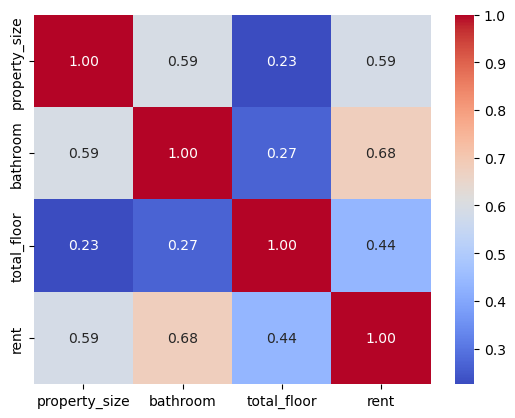

In [220]:
correlation_matrix = df[['property_size', 'bathroom', 'total_floor', 'rent']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Property Size vs. Rent Price:
Visualizing the relationship between property size and rent using scatter plots and a regression plot.

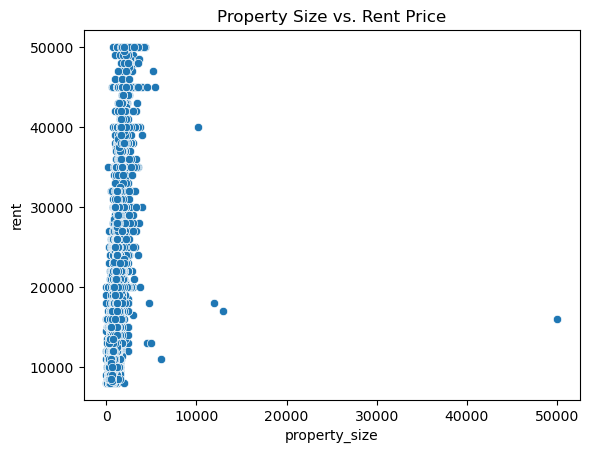

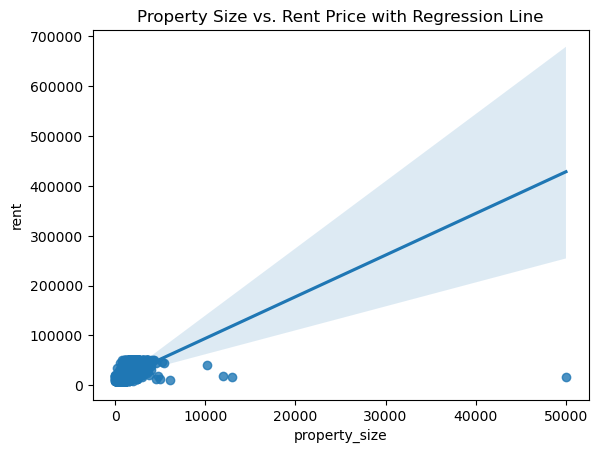

In [221]:
sns.scatterplot(x='property_size', y='rent', data=df)
plt.title('Property Size vs. Rent Price')
plt.show()

# Regression plot for property size vs. rent
sns.regplot(x='property_size', y='rent', data=df)
plt.title('Property Size vs. Rent Price with Regression Line')
plt.show()

 How the presence or absence of features (gym, lift, parking) affects rent prices.

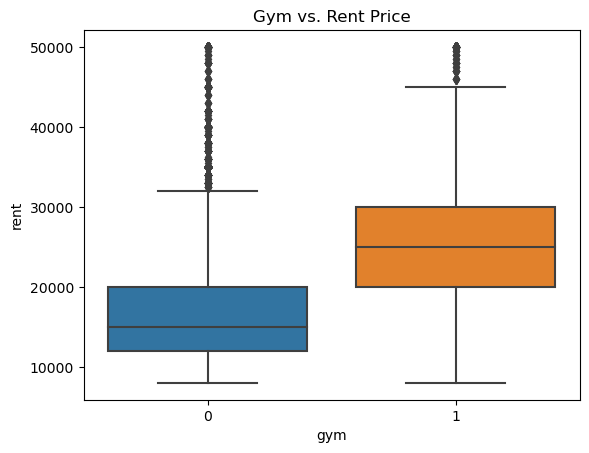

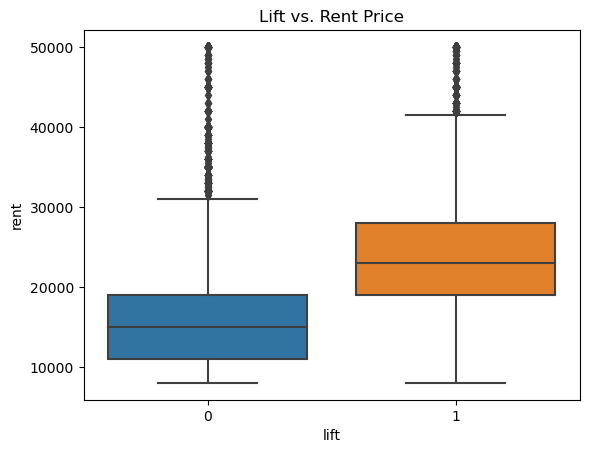

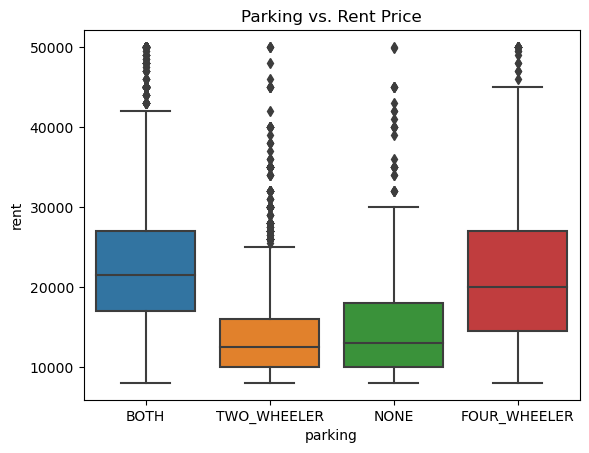

In [223]:
# Box plot for gym vs. rent
sns.boxplot(x='gym', y='rent', data=df)
plt.title('Gym vs. Rent Price')
plt.show()

# Box plot for lift vs. rent
sns.boxplot(x='lift', y='rent', data=df)
plt.title('Lift vs. Rent Price')
plt.show()

# Box plot for parking vs. rent
sns.boxplot(x='parking', y='rent', data=df)
plt.title('Parking vs. Rent Price')
plt.show()


Bar Plot for Furnishing Level:

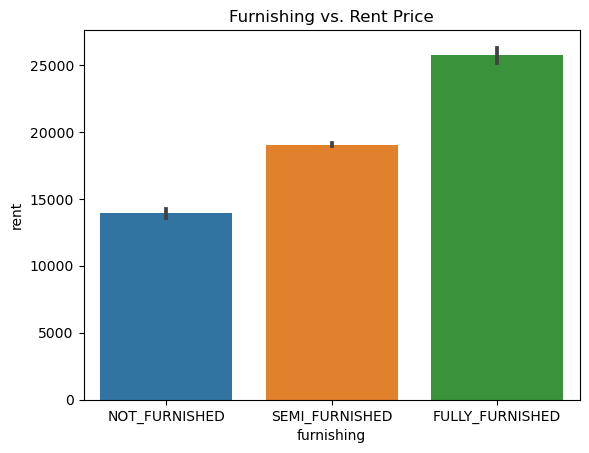

In [227]:
# Bar plot for furnishing vs. rent
sns.barplot(x='furnishing', y='rent', data=df, order=['NOT_FURNISHED', 'SEMI_FURNISHED', 'FULLY_FURNISHED'])
plt.title('Furnishing vs. Rent Price')
plt.show()


Regression plot rent and balcony

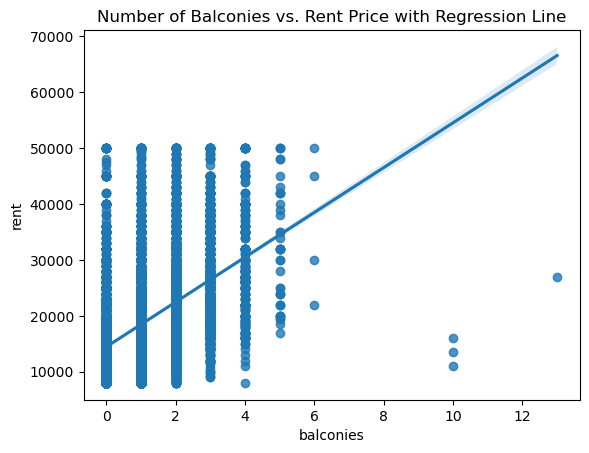

In [229]:
# Regression plot for balconies vs. rent
sns.regplot(x='balconies', y='rent', data=df)
plt.title('Number of Balconies vs. Rent Price with Regression Line')
plt.show()
